# Basic API for qttpdesolver package (3D case).

For illustration, we consider below the following solvers 

- Solver-FS (a new Finite Sum solver)

- Solver-FD (a Finite Difference solver) 

for 3D stationary diffusion type PDE with scalar coefficient.

<h3 style="color:green; padding-left: 20px;">See <b>api_basic_1d</b> file with detailed API description.</h3>

In [1]:
%matplotlib inline
import numpy as np

from qttpdesolver import Pde, auto_solve, Func
from qttpdesolver import MODE_NP, MODE_TT, MODE_SP, SOLVER_FS, SOLVER_FD, BC_HD, BC_PR

In [2]:
PDE = Pde(txt='Simple 3D PDE for test', dim=3) 

def f_func(x, y, z, w1, w2, w3):
    x2 = x*x; y2 = y*y; z2 = z*z
    t = x2*y*z2; tz = t*z; q = tz+1.
    s1 = np.sin(w1*x2*x); s2 = np.sin(w2*y2); s3 = np.sin(w3*z)
    c1 = np.cos(w1*x2*x); c2 = np.cos(w2*y2); c3 = np.cos(w3*z)
    f = 9.*w1*w1*x2*x2
    f+= 4.*w2*w2*y2
    f+=    w3*w3
    f*= q*s1*s2*s3
    f-= 6.*w1*x*(1.+2.*tz)*c1*s2*s3
    f-= 2.*w2*(1.+2.*tz)*s1*c2*s3
    f-= 3.*w3*t*s1*s2*c3
    return f

PDE.Kx  = Func(3, 'kx', '1+x^2*y*z^3').set_expr('1.+x*x*y*z*z*z')
PDE.Ky  = Func(3, 'ky', '1+x^2*y*z^3').set_expr('1.+x*x*y*z*z*z')
PDE.Kz  = Func(3, 'kz', '1+x^2*y*z^3').set_expr('1.+x*x*y*z*z*z')
PDE.F   = Func(3, 'f', '... according to exact solution u').set_func(f_func)
PDE.U   = Func(3, 'u_real', 'sin(w_1 x^3) sin(w_2 y^2) sin(w_3 z)').set_expr('np.sin(w1*x*x*x)*np.sin(w2*y*y)*np.sin(w3*z)')
PDE.Ux  = Func(3, 'ux_real', '3 w_1 x^2 cos(w_1 x^3) sin(w_2 y^2) sin(w_3 z)').set_expr('w1*3.*x*x*np.cos(w1*x*x*x)*np.sin(w2*y*y)*np.sin(w3*z)') 
PDE.Uy  = Func(3, 'uy_real', '2 w_2 y sin(w_1 x^3) cos(w_2 y^2) sin(w_3 z)').set_expr('w2*y*2.*np.sin(w1*x*x*x)*np.cos(w2*y*y)*np.sin(w3*z)') 
PDE.Uz  = Func(3, 'uz_real', 'w_3 sin(w_1 x^3) sin(w_2 y^2) cos(w_3 z)').set_expr('w3*np.sin(w1*x*x*x)*np.sin(w2*y*y)*np.cos(w3*z)') 
PDE.params = [np.pi/PDE.L * 2, np.pi/PDE.L * 3, np.pi/PDE.L * 4]
PDE.params_txt = 'w1 [=%-8.4f], w2 [=%-8.4f], w3 [=%-8.4f]' 
PDE.set_params([np.pi/PDE.L * 2, np.pi/PDE.L * 3, np.pi/PDE.L * 4], ['w1', 'w2', 'w3'], ['%-8.4f', '%-8.4f', '%-8.4f'])
PDE.present_model()

#We can use a model from the gallery instead:
#PDE.present_models()
PDE.set_model('divkgrad_3d_hd_analyt')
PDE.set_params([np.pi*2, np.pi*3, np.pi*4]) 

PDE        : Simple 3D PDE for test
Parameters : w1=6.2832  ; w2=9.4248  ; w3=12.5664 
BC         : hd
kx         = 1+x^2*y*z^3
ky         = 1+x^2*y*z^3
kz         = 1+x^2*y*z^3
f          = ... according to exact solution u
u_real     = sin(w_1 x^3) sin(w_2 y^2) sin(w_3 z)
ux_real    = 3 w_1 x^2 cos(w_1 x^3) sin(w_2 y^2) sin(w_3 z)
uy_real    = 2 w_2 y sin(w_1 x^3) cos(w_2 y^2) sin(w_3 z)
uz_real    = w_3 sin(w_1 x^3) sin(w_2 y^2) cos(w_3 z)



In [3]:
PDE.set_mode(MODE_TT)
PDE.set_solver_name(SOLVER_FS)
PDE.set_verb(verb_gen=True, verb_crs=False, verb_lss=True)
PDE.set_tau(tau=1.E-10, eps_lss=1.E-10, tau_lss=1.E-10)
PDE.set_lss_params(nswp=20, kickrank=4, local_prec='n', local_iters=2, 
                   local_restart=20, trunc_norm=1, max_full_size=100)
PDE.present_info()

__________________General parameters
Mode          : tt
Solver        : fs
Boundary cond.: hd
Parameters    : w1=6.2832  ; w2=9.4248  ; w3=12.5664 
__________________Verbosity parameters
verb_gen      : True
verb_crs      : False
verb_lss      : True
print_to_std  : True
print_to_file : False
__________________TT parameters
tau                : 1.00e-10
eps_lss            : 1.00e-10
tau_lss            : 1.00e-10
tau_real           : 1.00e-12
lss> nswp          : 20  
lss> kickrank      : 4   
lss> max full size : 100 
lss> local restart : 20  
lss> local iters   : 2   
lss> use sol0      : False



In [4]:
PDESolver = auto_solve(PDE, d=4, return_solver=True)

Time of coeffs.  generation: 0.3700  
Time of matrices generation: 0.3149  
Time of system generation  : 0.0537  
amen_solve: swp=1, max_dx= 9.712E-01, max_res= 9.682E-01, max_rank=33
amen_solve: swp=2, max_dx= 2.502E-01, max_res= 1.718E-01, max_rank=37
amen_solve: swp=3, max_dx= 1.343E-03, max_res= 4.693E-04, max_rank=41
amen_solve: swp=4, max_dx= 1.017E-05, max_res= 4.641E-06, max_rank=45
amen_solve: swp=5, max_dx= 2.602E-07, max_res= 7.352E-08, max_rank=49
amen_solve: swp=6, max_dx= 2.078E-08, max_res= 3.201E-09, max_rank=53
amen_solve: swp=7, max_dx= 1.967E-09, max_res= 2.845E-10, max_rank=52
amen_solve: swp=8, max_dx= 9.855E-11, max_res= 4.094E-11, max_rank=53
Time of system solving     : 4.1414  
Time of additional calcs.  : 0.3380  
d= 4|fs-tt|hd|er=5.9e-02 |erdx=3.5e-02 |erdy=3.1e-02 |erdz=3.4e-02 |T=   4.880|R=  16.5|It= 8


PDE                : Simple 3D PDE for test
PDE mode           : tt
Used PDE solver    : fs
Boundary condition : hd
PDE dimension      : 3   
Value of d         : 4   
Mesh 1D size       : 16  
Solution erank     : 16.53 
Analit. sol. erank : 2.05  
Solution error     : 5.87e-02
X-derivative error : 3.45e-02
Y-derivative error : 3.06e-02
Z-derivative error : 3.38e-02
(u, f) real        : 30.9931493557   
(u, f) calc        : 32.8955788115   
(u, f) err         : 6.14e-02
Solver iterations  : 8   
Matrix A erank     : 35  
Vector rhs erank   : 14  
Time: coeff.   (s.): 0.3700  
Time: matrices (s.): 0.3149  
Time: system   (s.): 0.0537  
Time: system   (s.): 4.1414  
Total time     (s.): 4.8800  
*Time: prep.   (s.): 0.3380  



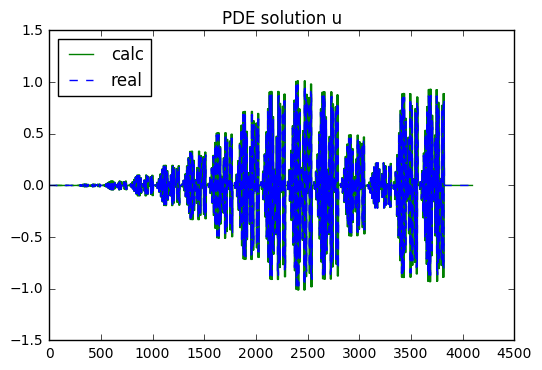

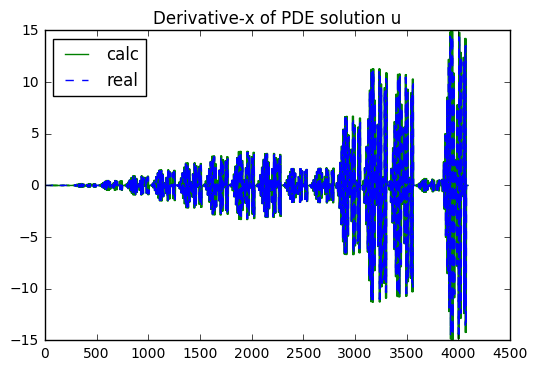

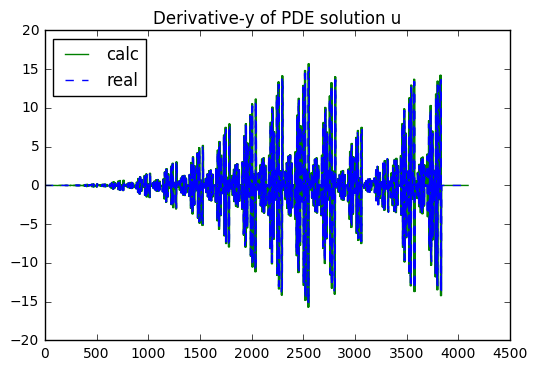

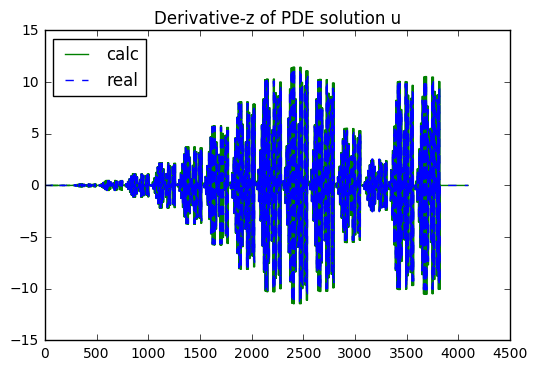

In [5]:
PDE.present_res()
PDE.plot_res()

### The following important variables and values are saved in Pde class instance after calculation (some of them may be None)

In [6]:
print PDE.u_calc
print PDE.u_real
print PDE.ux_calc
print PDE.ux_real
print PDE.uy_calc
print PDE.uy_real
print PDE.uz_calc
print PDE.uz_real
print PDE.uu_calc
print PDE.uf_calc

> tt-vector |u_calc|             [tau=1.00e-10] {d =12} (erank = 16.5)
> tt-vector |u_real|             [tau=1.00e-10] {d =12} (erank =  2.0)
> tt-vector |ux_calc|            [tau=1.00e-10] {d =12} (erank = 17.1)
> tt-vector |ux_real|            [tau=1.00e-10] {d =12} (erank =  2.0)
> tt-vector |uy_calc|            [tau=1.00e-10] {d =12} (erank = 17.4)
> tt-vector |uy_real|            [tau=1.00e-10] {d =12} (erank =  2.0)
> tt-vector |uz_calc|            [tau=1.00e-10] {d =12} (erank = 17.4)
> tt-vector |uz_real|            [tau=1.00e-10] {d =12} (erank =  2.0)
0.0797783123258
32.8955788115


### The following variables are saved in PDESolver class instance (for Solver_FS) after calculation

In [7]:
print PDESolver.f
print PDESolver.iKx
print PDESolver.iKy
print PDESolver.iKz
print PDESolver.Bx
print PDESolver.By
print PDESolver.Bz
print PDESolver.iqx
print PDESolver.iqy
print PDESolver.iqz
print PDESolver.qx
print PDESolver.qy
print PDESolver.qz
print PDESolver.Wx
print PDESolver.Wy
print PDESolver.Wz
print PDESolver.Rx
print PDESolver.Ry
print PDESolver.Rz
print PDESolver.Hx
print PDESolver.Hy
print PDESolver.Hz
print PDESolver.A
print PDESolver.rhs
print PDESolver.wx
print PDESolver.wy

> tt-vector |f|                  [tau=1.00e-10] {d =12} (erank =  5.8)
> tt-matrix |iKx|                [tau=1.00e-10] {d =12} (erank = 10.0)
> tt-matrix |iKy|                [tau=1.00e-10] {d =12} (erank = 10.0)
> tt-matrix |iKz|                [tau=1.00e-10] {d =12} (erank = 10.0)
> tt-matrix |Bx|                 [tau=1.00e-10] {d =12} (erank =  1.3)
> tt-matrix |By|                 [tau=1.00e-10] {d =12} (erank =  1.3)
> tt-matrix |Bz|                 [tau=1.00e-10] {d =12} (erank =  1.3)
> tt-vector |iqx|                [tau=1.00e-10] {d = 8} (erank =  5.2)
> tt-vector |iqy|                [tau=1.00e-10] {d = 8} (erank =  5.8)
> tt-vector |iqz|                [tau=1.00e-10] {d = 8} (erank =  5.2)
> tt-vector |qx|                 [tau=1.00e-10] {d = 8} (erank =  5.2)
> tt-vector |qy|                 [tau=1.00e-10] {d = 8} (erank =  5.4)
> tt-vector |qz|                 [tau=1.00e-10] {d = 8} (erank =  5.2)
> tt-matrix |Wx|                 [tau=1.00e-10] {d =12} (erank =  4.1)
> tt-m

### Note that all variables have type Vector or Matrix from subpackage tensor_wrapper.

This is format-free representation of arrays (operations in MODE_NP, MODE_TT and MODE_SP have the same form in this format). 

If one needs numpy array, then to_np property should be called (it works only for moderate d values).

Property to_tt converts Vector or Matrix class instance to tt-format. 

Otherwise the .x property may be used - it contains the np.ndarray or tt.vector or tt.matrix or scipy.sparse scr matrix.

In [8]:
print type(PDESolver.A)
A_tt = PDESolver.A.to_tt
print type(A_tt)
A_np = PDESolver.A.to_np
print type(A_np)
print A_np.shape
print type(PDESolver.A.x)

<class 'qttpdesolver.tensor_wrapper.matrix.Matrix'>
<class 'tt.core.matrix.matrix'>
<type 'numpy.ndarray'>
(8192, 8192)
<class 'tt.core.matrix.matrix'>
